# Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading Dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Machine learning Projects/Car price predict/car_data.csv")

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Checking for Null Values

In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# View Statistics

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Viewing all columns

In [8]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Viewing count of categorical columns

In [9]:
print(data['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [10]:
print(data['Seller_Type'].value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [11]:
print(data['Transmission'].value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [12]:
fuel_type = data['Fuel_Type']
seller_type = data['Seller_Type']
transmission_type = data['Transmission']
selling_price = data['Selling_Price']

# Visualizing Categorical Columns

In [13]:
from matplotlib import style

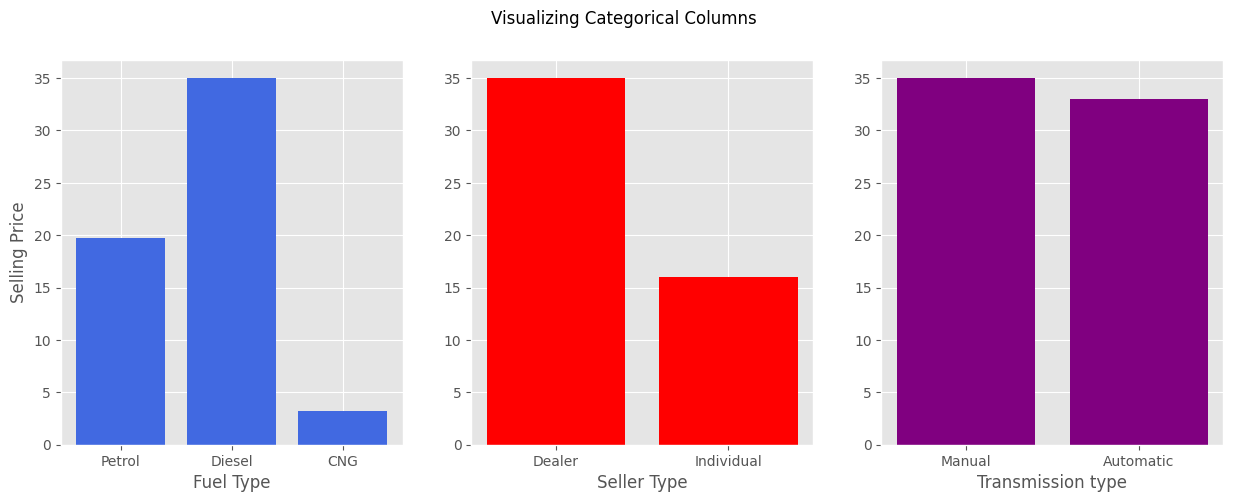

In [14]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing Categorical Columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

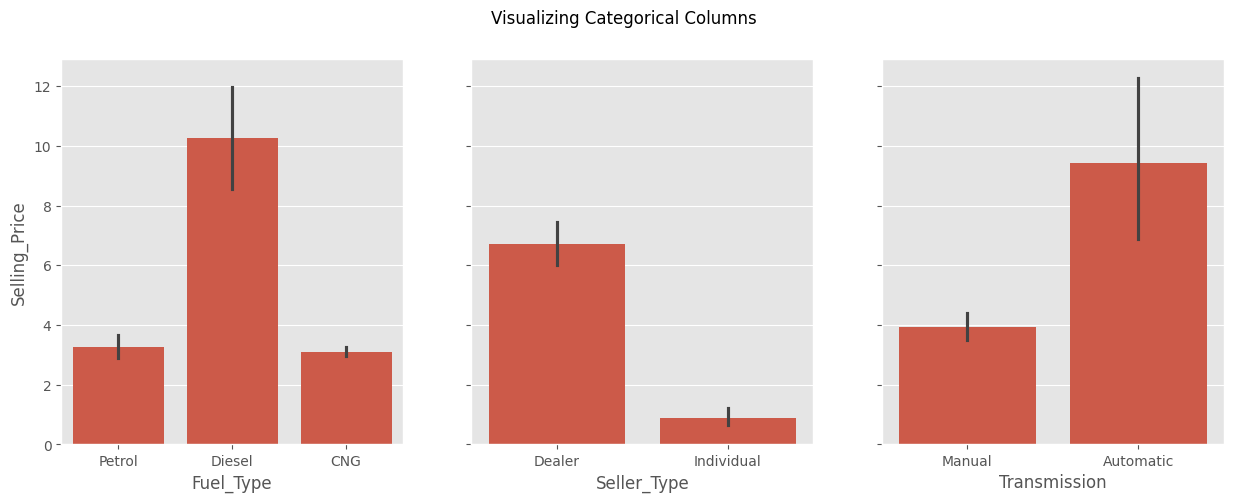

In [15]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing Categorical Columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

# Grouping and Checking above plots

In [16]:
petrol_data = data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [17]:
seller_data = data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


# Converting Categorical values into Numerical

In [18]:
data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

In [19]:
data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

In [20]:
data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [21]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Correlation between columns

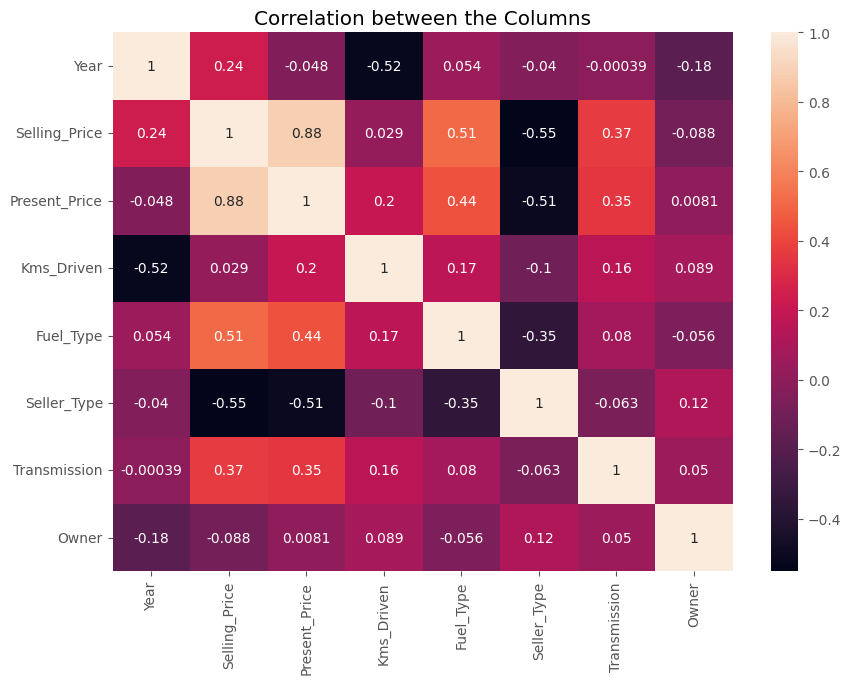

In [38]:
# Drop columns with string data type
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation between the Columns')
plt.show()

# Correlation between Present Price and Selling Price

<Axes: title={'center': 'Correlation between Present price and Selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

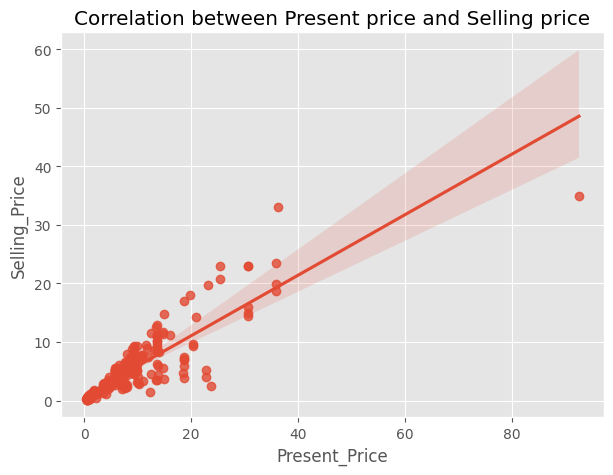

In [23]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between Present price and Selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=data)

# Creating X and y matrix

In [24]:
X = data.drop(['Car_Name','Selling_Price'], axis=1)
y = data["Selling_Price"]

In [25]:
X.shape

(301, 7)

In [26]:
y.shape

(301,)

# Splitting X and y into training set and testing set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

# Normalizing data in columns

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Importing Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

# Instantiating the model

In [32]:
linreg = LinearRegression()

# Fitting the model

In [33]:
linreg.fit(X_train,y_train)

LinearRegression()

# Predicting the result

In [34]:
y_pred = linreg.predict(X_test)

# Performance Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
print("MAE: ", (mean_absolute_error(y_pred, y_test)))
print("MSE: ", (mean_squared_error(y_pred, y_test)))
print("R2 score: ", (r2_score(y_pred, y_test)))

MAE:  1.4308902766497633
MSE:  5.167492869813309
R2 score:  0.7788840497698761


# Regression Plot : Predicted Values vs Actual Values

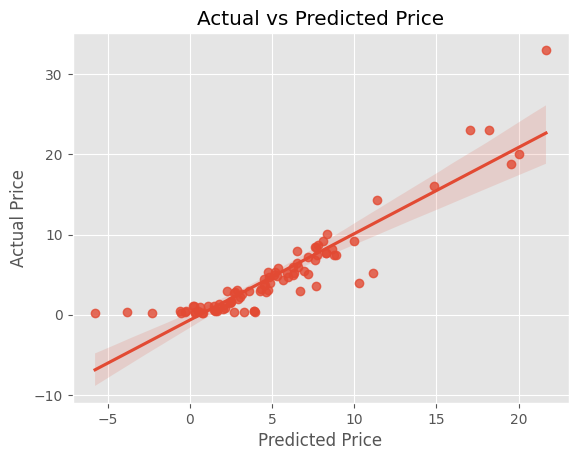

In [37]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted Price")
plt.show()